In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("./dataset/train.csv")
test = pd.read_csv("./dataset/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:>

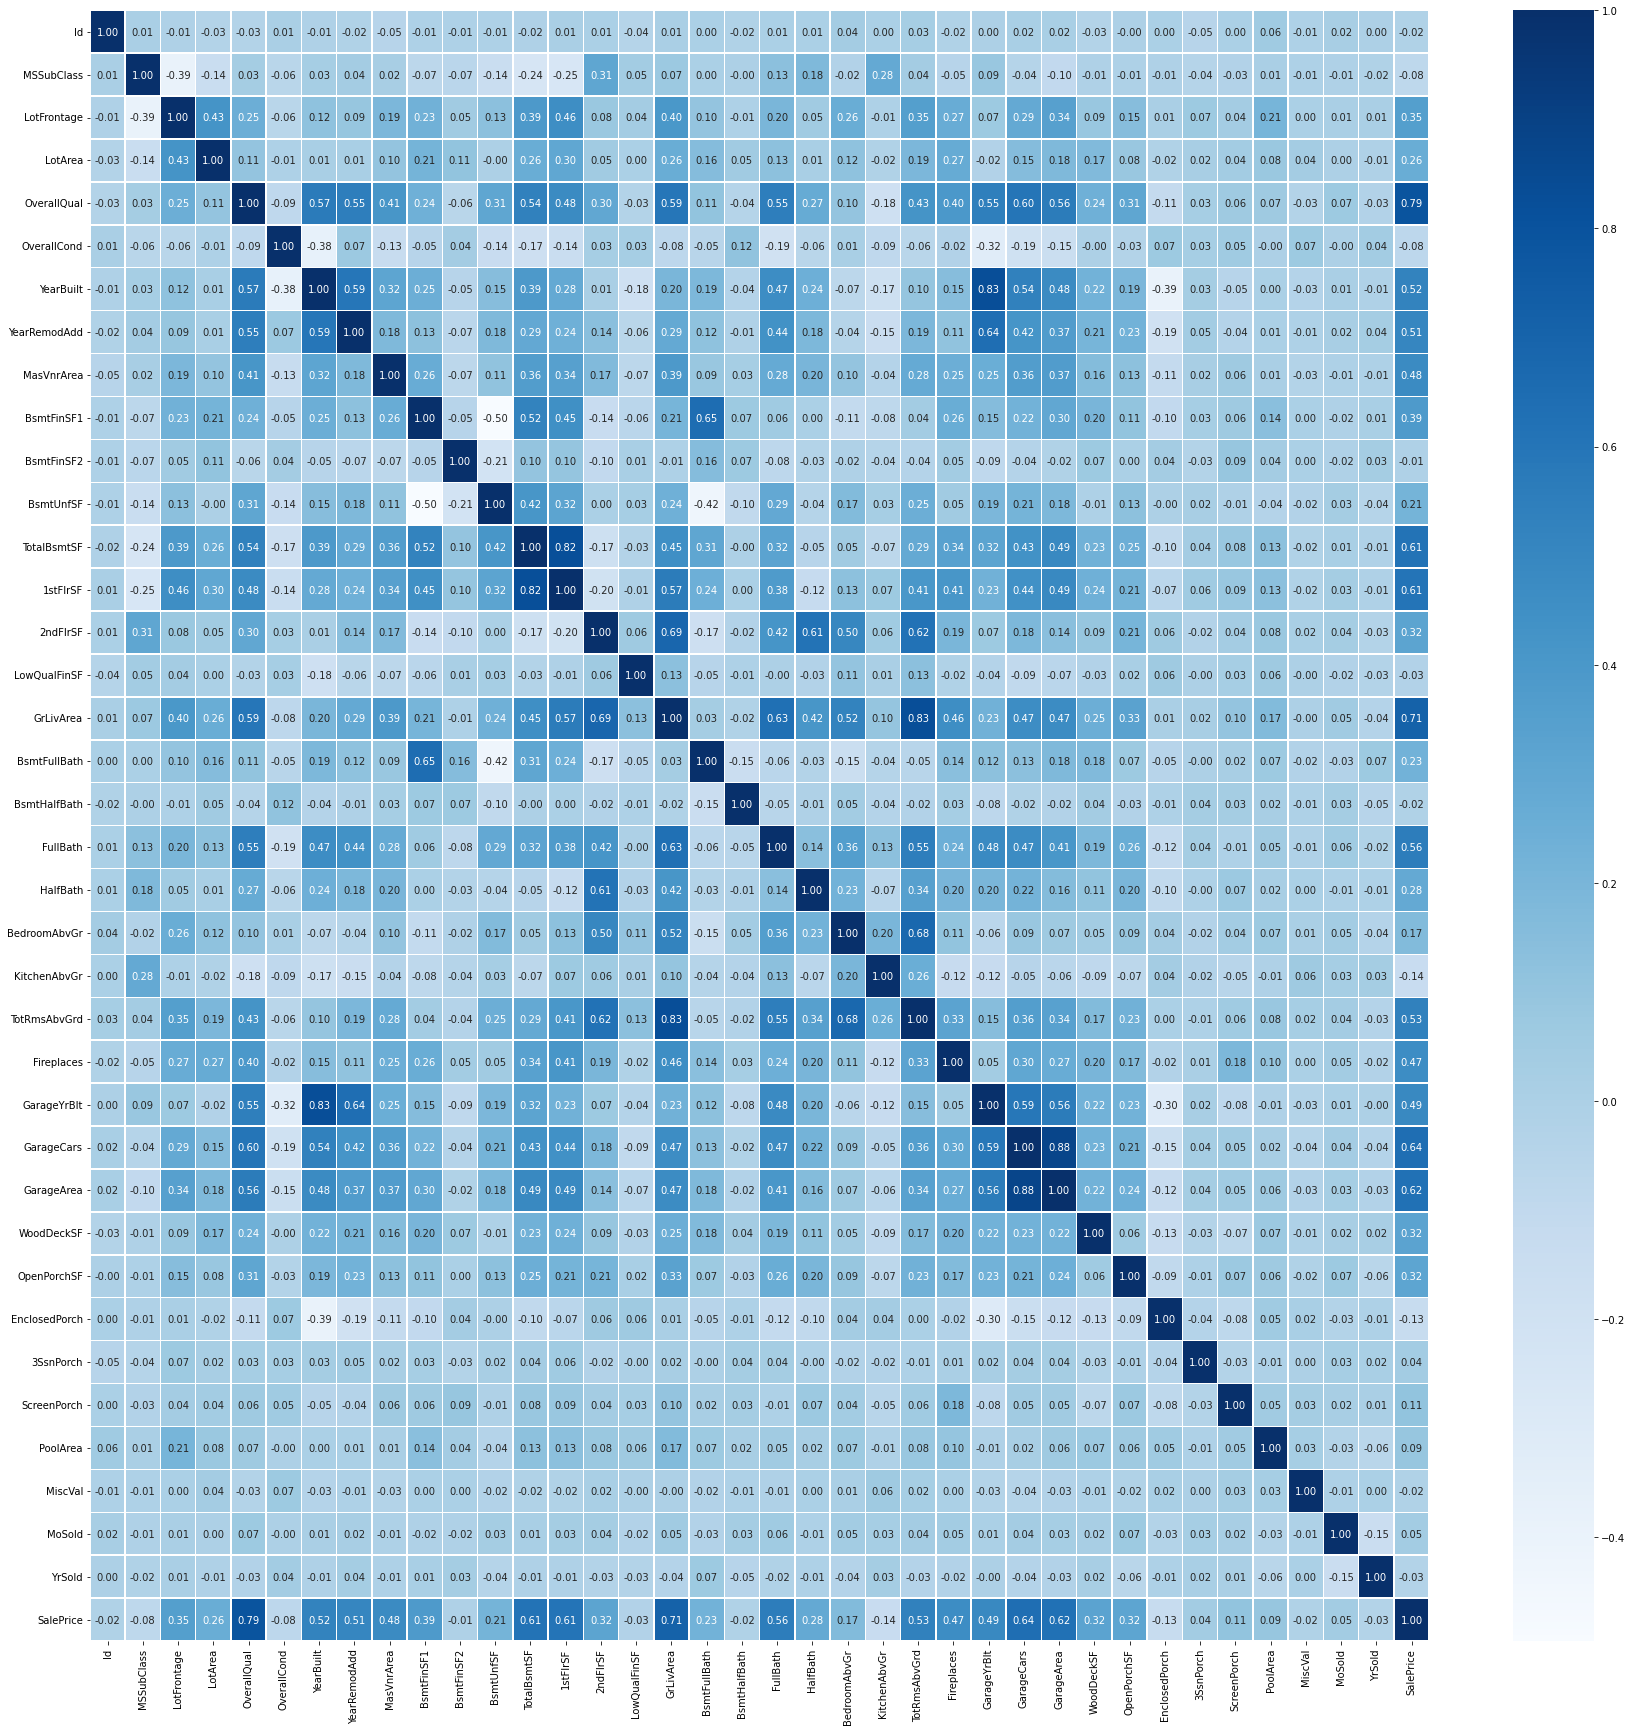

In [4]:
plt.figure(figsize=(30,30))
sb.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

* Save

  - LotFrontage
  - LotArea(0.26)
  - OverallQual
  - YearBuilt
  - YearRemodAdd
  - MasVnrArea
  - BsmFinSF1
  - BsmtUnfSF(0.21)
  - TotalBsmtSF
  - 1stFlrSF
  - 2ndFlrSF
  - GrLivArea
  - BsmtFullBath(0.23)
  - FullBath
  - HalfBath(0.28)
  - TotRmsAbvGrd
  - Fireplaces
  - GarageYrBlt
  - GarageCars
  - GarageArea
  - WoodDeckSF
  - OpenPorchSF

In [5]:
train.shape

(1460, 81)

In [6]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

* null_object
  - LotFrontage(259)
  - MasVnrType(8)
  - MasVnrArea(8)
  - BsmtQual(37)
  - BsmtCond(37)
  - BsmtExposure(38)
  - BsmtFinType1(37)
  - BsmtFinType2(38)
  - Electrical(1)
  - FireplaceQu(690)
  - GarageType(81)
  - GarageYrBlt(81)
  - GarageFinish(81)
  - GarageQual(81)
  - GarageCond(81)
   
  


In [7]:
train["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

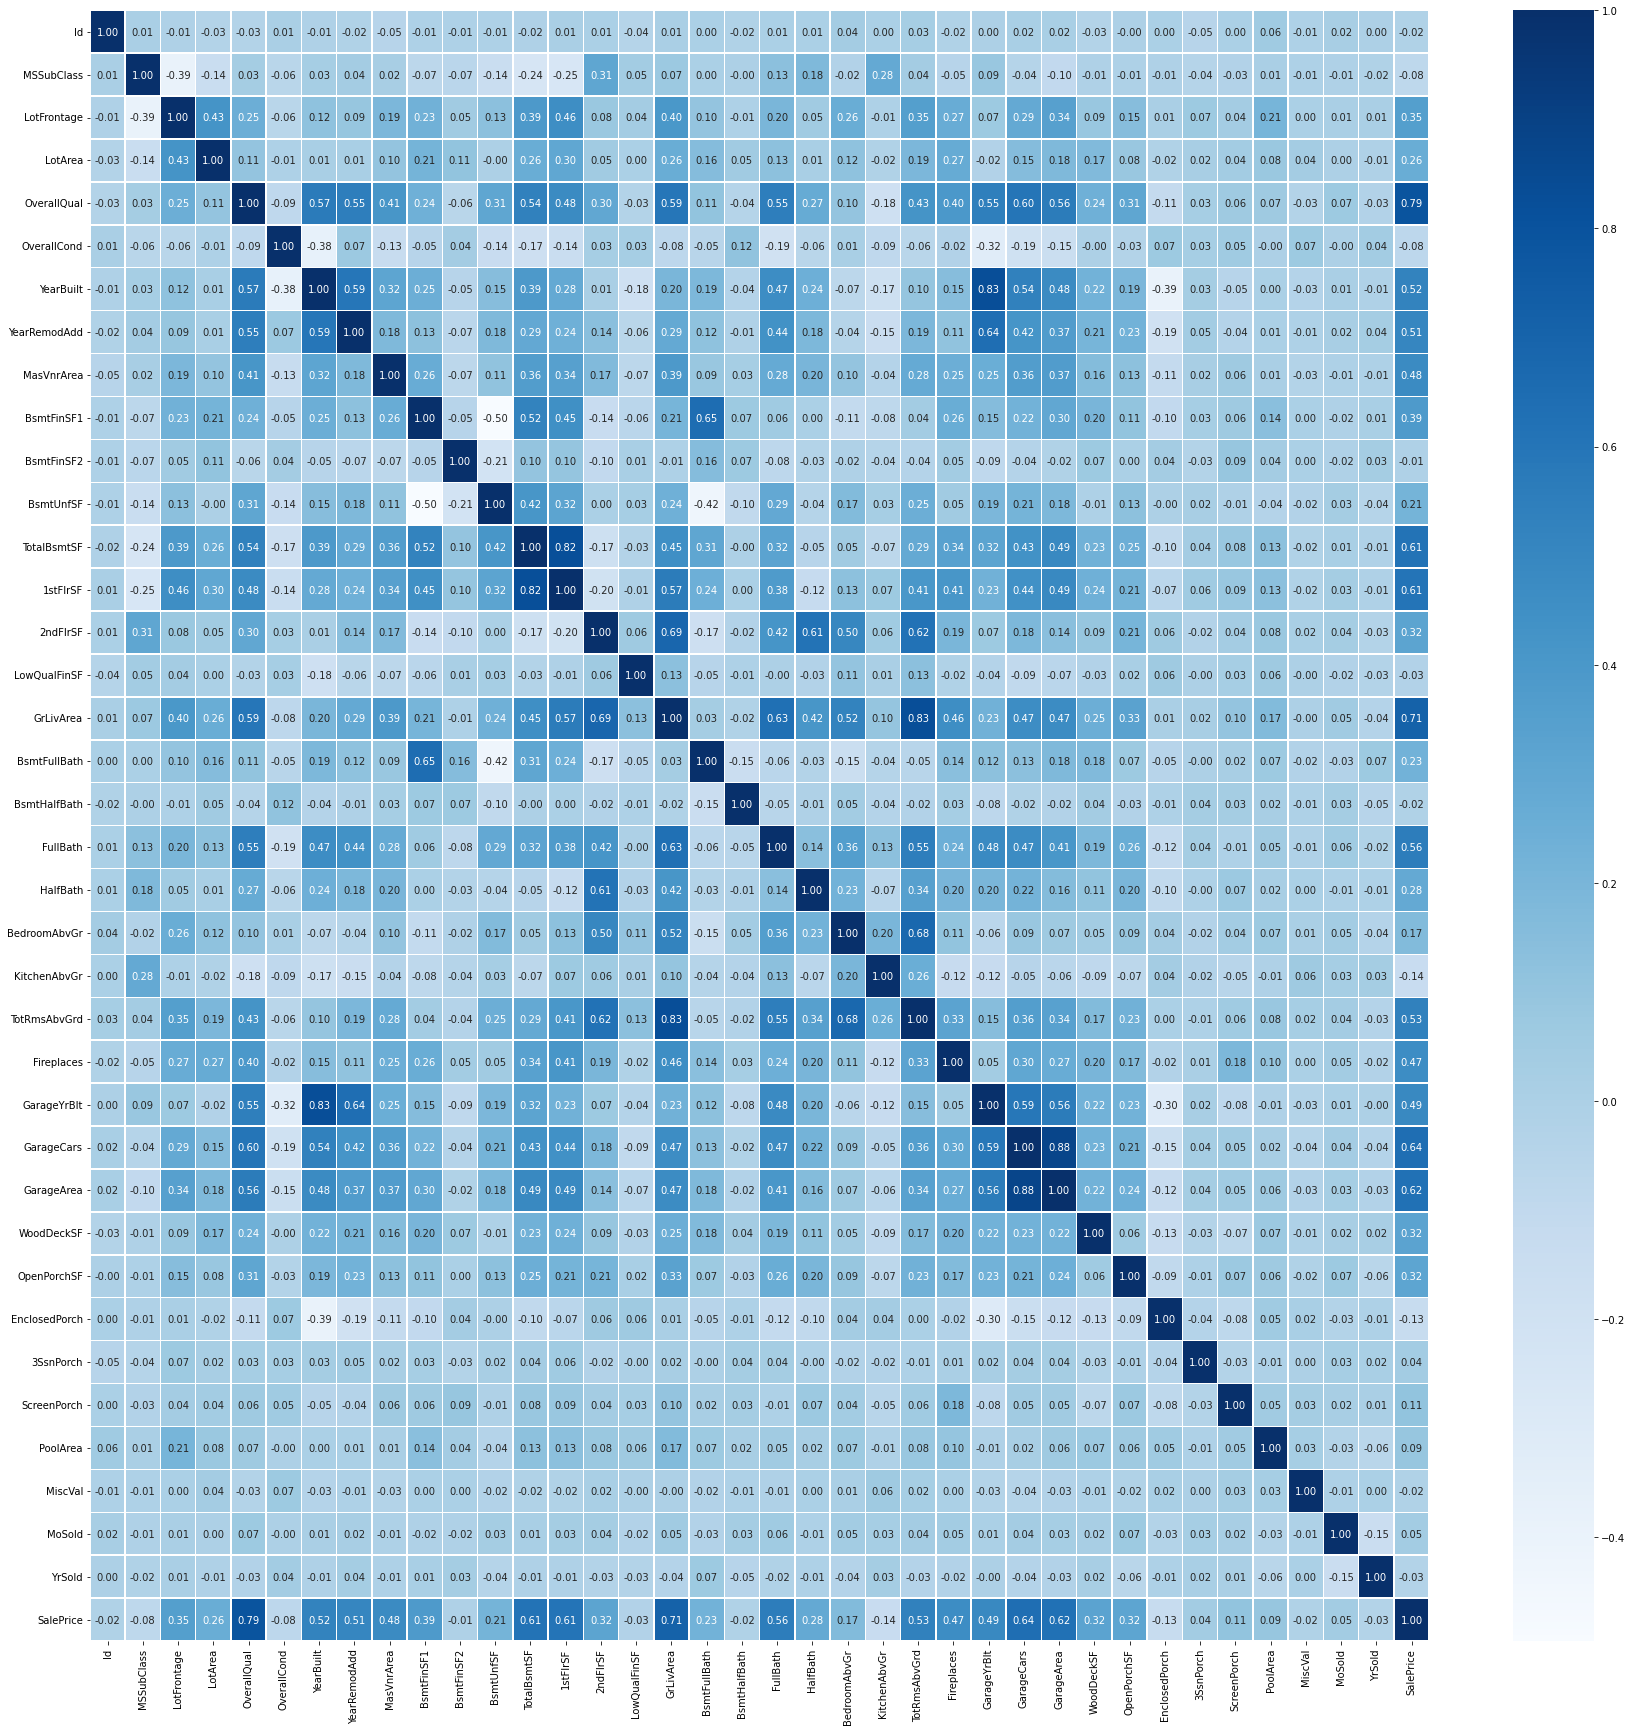

In [9]:
plt.figure(figsize=(30,30))
sb.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:xlabel='1stFlrSF', ylabel='LotFrontage'>

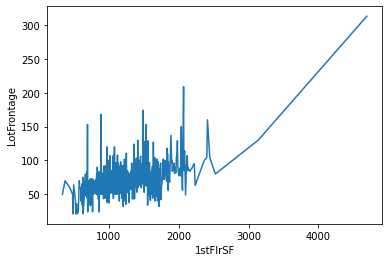

In [10]:
sb.lineplot(x="1stFlrSF", y="LotFrontage", ci=None, data=train)

In [11]:
train["LotFrontage"].fillna(train["LotFrontage"].mean(), inplace=True)
test["LotFrontage"].fillna(train["LotFrontage"].mean(), inplace=True)

In [12]:
train["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [13]:
a = train[train["MasVnrType"].isnull()].index.tolist()
b = train[train["MasVnrArea"].isnull()].index.tolist()
print(a)
print(b)

[234, 529, 650, 936, 973, 977, 1243, 1278]
[234, 529, 650, 936, 973, 977, 1243, 1278]


In [14]:
train["MasVnrType"].fillna(train["MasVnrType"].mode()[0], inplace=True)
test["MasVnrType"].fillna(train["MasVnrType"].mode()[0], inplace=True)
train["MasVnrArea"].fillna(0, inplace=True)
test["MasVnrArea"].fillna(0, inplace=True)

In [15]:
qual = train[train["BsmtQual"].isnull()].index.tolist()
cond = train[train["BsmtCond"].isnull()].index.tolist()
ex = train[train["BsmtExposure"].isnull()].index.tolist()
t1 = train[train["BsmtFinType1"].isnull()].index.tolist()
t2 = train[train["BsmtFinType2"].isnull()].index.tolist()
print(qual)
print(cond)
print(ex)
print(t1)
print(t2)

[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]
[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]
[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 948, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]
[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]
[17, 39, 90, 102, 156, 182, 259, 332, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]


In [16]:
train["BsmtQual"][948]

'Gd'

In [17]:
train["BsmtCond"][948]

'TA'

In [18]:
train[train["BsmtQual"] == 'Gd']["BsmtExposure"].value_counts()

No    359
Av    135
Gd     69
Mn     54
Name: BsmtExposure, dtype: int64

In [19]:
train[train["BsmtCond"] == 'TA']["BsmtExposure"].value_counts()

No    877
Av    207
Gd    122
Mn    104
Name: BsmtExposure, dtype: int64

In [20]:
train["BsmtExposure"][948] = "No"

In [21]:
print(train["BsmtQual"][332])
print(train["BsmtCond"][332])
print(train["BsmtFinSF2"][332])

Gd
TA
479


In [22]:
print(train[train["BsmtCond"] == 'Gd']["BsmtFinType2"].value_counts())
print(train[train["BsmtCond"] == 'TA']["BsmtFinType2"].value_counts())

Unf    50
ALQ     5
BLQ     3
Rec     3
LwQ     3
GLQ     1
Name: BsmtFinType2, dtype: int64
Unf    1161
Rec      50
LwQ      42
BLQ      30
ALQ      14
GLQ      13
Name: BsmtFinType2, dtype: int64


In [23]:
train["BsmtFinType2"][332] = 'Unf'

In [24]:
train["BsmtFinType2"].isnull().sum()

37

In [25]:
train["BsmtQual"].fillna("X", inplace=True)
train["BsmtCond"].fillna("X", inplace=True)
train["BsmtExposure"].fillna("X", inplace=True)
train["BsmtFinType1"].fillna("X", inplace=True)
train["BsmtFinType2"].fillna("X", inplace=True)

In [26]:
train["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [27]:
train["Electrical"].fillna("SBrkr", inplace=True)

In [28]:
train["GarageYrBlt"].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [29]:
train["GarageType"].fillna("X", inplace=True)
train["GarageYrBlt"].fillna(0, inplace=True)
train["GarageFinish"].fillna("X", inplace=True)
train["GarageQual"].fillna("X", inplace=True)
train["GarageCond"].fillna("X", inplace=True)

In [30]:
corr_drop = ['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']
train = train.drop(corr_drop, axis=1)
test = test.drop(corr_drop, axis=1)

In [31]:
null_drop = ['Alley', 'Fence', 'MiscFeature', 'PoolQC', 'FireplaceQu']
train = train.drop(null_drop, axis=1)
test = test.drop(null_drop, axis=1)

In [32]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [33]:
test.columns[test.isnull().any()].tolist()

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [34]:
test["MSZoning"].isnull().sum()

4

In [35]:
train["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [36]:
test["MSZoning"].fillna("RL", inplace=True)

In [37]:
test["Utilities"].isnull().sum()

2

In [38]:
train["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [39]:
test["Utilities"].fillna("AllPub", inplace=True)

In [40]:
test["Exterior1st"].isnull().sum()

1

In [41]:
train["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [42]:
test["Exterior1st"].fillna("VinylSd", inplace=True)

In [43]:
test["Exterior2nd"].isnull().sum()

1

In [44]:
train["Exterior2nd"].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [45]:
test["Exterior2nd"].fillna("VinylSd", inplace=True)

In [46]:
qual = test[test["BsmtQual"].isnull()].index.tolist()
cond = test[test["BsmtCond"].isnull()].index.tolist()
ex = test[test["BsmtExposure"].isnull()].index.tolist()
sf1 = test[test["BsmtFinType1"].isnull()].index.tolist()
sf2 = test[test["BsmtFinType2"].isnull()].index.tolist()
print(qual)
print(cond)
print(ex)
print(sf1)
print(sf2)

[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 730, 733, 756, 757, 758, 764, 927, 975, 992, 993, 1030, 1038, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 580, 590, 606, 608, 660, 662, 725, 728, 729, 730, 733, 756, 764, 927, 975, 992, 993, 1030, 1038, 1064, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[27, 125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 730, 733, 756, 764, 888, 927, 975, 992, 993, 1030, 1038, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 730, 733, 756, 764, 927, 975, 992, 993, 1030, 1038, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 

In [47]:
qual_fix = []
for q in qual:
    if q not in cond or q not in ex or q not in sf1 or q not in sf2:
        qual_fix.append(q)

cond_fix = []
for c in cond:
    if c not in qual or c not in ex or c not in sf1 or c not in sf2:
        cond_fix.append(c)

ex_fix = []
for e in ex:
    if e not in qual or e not in cond or e not in sf1 or e not in sf2:
        ex_fix.append(e)

sf1_fix = []
for s in sf1:
    if s not in qual or s not in cond or s not in ex or s not in sf2:
        sf1_fix.append(s)

sf2_fix = []
for s2 in sf2:
    if s2 not in qual or s2 not in cond or s2 not in ex or s2 not in sf1:
        sf2_fix.append(s2)
print(qual_fix)
print(cond_fix)
print(ex_fix)
print(sf1_fix)
print(sf2_fix)

[757, 758]
[580, 725, 1064]
[27, 888]
[]
[]


In [48]:
test["BsmtCond"][757]

'Fa'

In [49]:
test["BsmtExposure"][757]

'No'

In [50]:
train[train["BsmtCond"] == "Fa"]["BsmtQual"].value_counts()

TA    35
Fa     8
Gd     2
Name: BsmtQual, dtype: int64

In [51]:
train[train["BsmtExposure"] == "No"]["BsmtQual"].value_counts()

TA    522
Gd    360
Ex     43
Fa     29
Name: BsmtQual, dtype: int64

In [52]:
test["BsmtQual"][757] = "TA"

In [53]:
test["BsmtCond"][758]

'TA'

In [54]:
test["BsmtExposure"][758]

'No'

In [55]:
train[train["BsmtCond"] == "TA"]["BsmtQual"].value_counts()

TA    596
Gd    580
Ex    110
Fa     25
Name: BsmtQual, dtype: int64

In [56]:
train[train["BsmtExposure"] == "No"]["BsmtQual"].value_counts()

TA    522
Gd    360
Ex     43
Fa     29
Name: BsmtQual, dtype: int64

In [57]:
test["BsmtQual"][758] = "TA"

In [58]:
test["BsmtQual"][580]

'Gd'

In [59]:
test["BsmtExposure"][580]

'Mn'

In [60]:
train[train["BsmtQual"] == "Gd"]["BsmtCond"].value_counts()

TA    580
Gd     36
Fa      2
Name: BsmtCond, dtype: int64

In [61]:
train[train["BsmtExposure"] == "Mn"]["BsmtCond"].value_counts()

TA    104
Fa      5
Gd      5
Name: BsmtCond, dtype: int64

In [62]:
test["BsmtCond"][580] = "TA"

In [63]:
test["BsmtQual"][725]

'TA'

In [64]:
test["BsmtExposure"][725]

'No'

In [65]:
train[train["BsmtQual"] == "TA"]["BsmtCond"].value_counts()

TA    596
Fa     35
Gd     18
Name: BsmtCond, dtype: int64

In [66]:
train[train["BsmtExposure"] == "No"]["BsmtCond"].value_counts()

TA    878
Fa     39
Gd     36
Po      1
Name: BsmtCond, dtype: int64

In [67]:
test["BsmtCond"][725] = "TA"

In [68]:
test["BsmtQual"][1064]

'TA'

In [69]:
test["BsmtExposure"][1064]

'Av'

In [70]:
train[train["BsmtQual"] == "TA"]["BsmtCond"].value_counts()

TA    596
Fa     35
Gd     18
Name: BsmtCond, dtype: int64

In [71]:
train[train["BsmtExposure"] == "Av"]["BsmtCond"].value_counts()

TA    207
Gd     14
Name: BsmtCond, dtype: int64

In [72]:
test["BsmtCond"][1064] = "TA"

In [73]:
test["BsmtQual"][27]

'Gd'

In [74]:
test["BsmtCond"][27]

'TA'

In [75]:
train[train["BsmtQual"] == "Gd"]["BsmtExposure"].value_counts()

No    360
Av    135
Gd     69
Mn     54
Name: BsmtExposure, dtype: int64

In [76]:
train[train["BsmtCond"] == "TA"]["BsmtExposure"].value_counts()

No    878
Av    207
Gd    122
Mn    104
Name: BsmtExposure, dtype: int64

In [77]:
test["BsmtExposure"][27] = "No"

In [78]:
test["BsmtQual"][888]

'Gd'

In [79]:
test["BsmtCond"][888]

'TA'

In [80]:
train[train["BsmtQual"] == "Gd"]["BsmtExposure"].value_counts()

No    360
Av    135
Gd     69
Mn     54
Name: BsmtExposure, dtype: int64

In [81]:
train[train["BsmtCond"] == "TA"]["BsmtExposure"].value_counts()

No    878
Av    207
Gd    122
Mn    104
Name: BsmtExposure, dtype: int64

In [82]:
test["BsmtExposure"][888] = "No"

In [83]:
qual = test[test["BsmtQual"].isnull()].index.tolist()
cond = test[test["BsmtCond"].isnull()].index.tolist()
ex = test[test["BsmtExposure"].isnull()].index.tolist()
sf1 = test[test["BsmtFinType1"].isnull()].index.tolist()
sf2 = test[test["BsmtFinType2"].isnull()].index.tolist()
print(qual)
print(cond)
print(ex)
print(sf1)
print(sf2)

[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 730, 733, 756, 764, 927, 975, 992, 993, 1030, 1038, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 730, 733, 756, 764, 927, 975, 992, 993, 1030, 1038, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 730, 733, 756, 764, 927, 975, 992, 993, 1030, 1038, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 730, 733, 756, 764, 927, 975, 992, 993, 1030, 1038, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364, 1431, 1444]
[125, 133, 269, 318, 354, 387, 388, 396, 397, 398, 400, 455, 590, 606, 608, 660, 662, 728, 729, 

In [84]:
qual_fix = []
for q in qual:
    if q not in cond or q not in ex or q not in sf1 or q not in sf2:
        qual_fix.append(q)

cond_fix = []
for c in cond:
    if c not in qual or c not in ex or c not in sf1 or c not in sf2:
        cond_fix.append(c)

ex_fix = []
for e in ex:
    if e not in qual or e not in cond or e not in sf1 or e not in sf2:
        ex_fix.append(e)

sf1_fix = []
for s in sf1:
    if s not in qual or s not in cond or s not in ex or s not in sf2:
        sf1_fix.append(s)

sf2_fix = []
for s2 in sf2:
    if s2 not in qual or s2 not in cond or s2 not in ex or s2 not in sf1:
        sf2_fix.append(s2)
print(qual_fix)
print(cond_fix)
print(ex_fix)
print(sf1_fix)
print(sf2_fix)

[]
[]
[]
[]
[]


In [85]:
test["BsmtQual"].fillna("X", inplace=True)
test["BsmtCond"].fillna("X", inplace=True)
test["BsmtExposure"].fillna("X", inplace=True)
test["BsmtFinType1"].fillna("X", inplace=True)
test["BsmtFinType2"].fillna("X", inplace=True)

In [86]:
test["BsmtFinSF1"].isnull().sum()

1

<AxesSubplot:xlabel='BsmtQual', ylabel='BsmtFinSF1'>

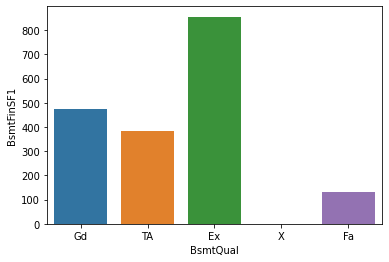

In [87]:
sb.barplot(x="BsmtQual", y="BsmtFinSF1", ci=None, data=train)

In [88]:
test["BsmtFinSF1"].fillna(train.groupby("BsmtQual")["BsmtFinSF1"].transform("mean").astype("int64"), inplace=True)

<AxesSubplot:xlabel='BsmtQual', ylabel='BsmtUnfSF'>

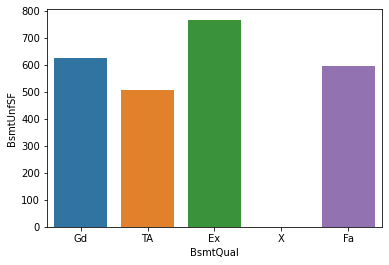

In [89]:
sb.barplot(x='BsmtQual', y='BsmtUnfSF', ci=None, data=train)

In [90]:
test["BsmtUnfSF"].fillna(train.groupby("BsmtQual")["BsmtUnfSF"].transform("mean"), inplace=True)

In [91]:
test["TotalBsmtSF"].isnull().sum()

1

<AxesSubplot:xlabel='BsmtQual', ylabel='TotalBsmtSF'>

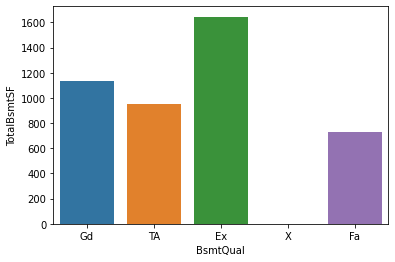

In [92]:
sb.barplot(x="BsmtQual", y="TotalBsmtSF", ci=None, data=train)

In [93]:
test["TotalBsmtSF"].fillna(train.groupby("BsmtQual")["TotalBsmtSF"].transform("mean"), inplace=True)

In [94]:
test["BsmtFullBath"].isnull().sum()

2

In [95]:
train["BsmtFullBath"].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [96]:
test["BsmtFullBath"].fillna(train["BsmtFullBath"].mode()[0], inplace=True)

In [97]:
test["KitchenQual"].isnull().sum()

1

In [98]:
train["KitchenAbvGr"].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [99]:
test[test["KitchenQual"].isnull()].index.tolist()

[95]

In [100]:
test["KitchenAbvGr"][95]

1

In [101]:
train[train["KitchenAbvGr"] == 1]["KitchenQual"].value_counts()

TA    675
Gd    583
Ex    100
Fa     34
Name: KitchenQual, dtype: int64

In [102]:
test["KitchenQual"][95] = "TA"

In [103]:
test["Functional"].isnull().sum()

2

In [104]:
train["Functional"].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [105]:
test["Functional"].fillna(train["Functional"].mode()[0], inplace=True)

In [106]:
ty = test[test["GarageType"].isnull()].index.tolist()
blt = test[test["GarageYrBlt"].isnull()].index.tolist()
fi = test[test["GarageFinish"].isnull()].index.tolist()
car = test[test["GarageCars"].isnull()].index.tolist()
area = test[test["GarageArea"].isnull()].index.tolist()
qual = test[test["GarageQual"].isnull()].index.tolist()
cond = test[test["GarageCond"].isnull()].index.tolist()

print(ty)
print(blt)
print(fi)
print(car)
print(area)
print(qual)
print(cond)

[53, 71, 79, 92, 96, 98, 100, 130, 133, 134, 154, 155, 257, 261, 327, 348, 350, 351, 359, 362, 371, 374, 376, 379, 387, 433, 550, 621, 630, 633, 636, 639, 644, 675, 691, 693, 729, 730, 731, 732, 733, 752, 778, 786, 893, 894, 938, 939, 962, 966, 1092, 1093, 1097, 1115, 1119, 1143, 1149, 1231, 1233, 1248, 1307, 1311, 1329, 1331, 1339, 1399, 1402, 1410, 1428, 1431, 1432, 1433, 1449, 1453, 1454, 1457]
[53, 71, 79, 92, 96, 98, 100, 130, 133, 134, 154, 155, 257, 261, 327, 348, 350, 351, 359, 362, 371, 374, 376, 379, 387, 433, 550, 621, 630, 633, 636, 639, 644, 666, 675, 691, 693, 729, 730, 731, 732, 733, 752, 778, 786, 893, 894, 938, 939, 962, 966, 1092, 1093, 1097, 1115, 1116, 1119, 1143, 1149, 1231, 1233, 1248, 1307, 1311, 1329, 1331, 1339, 1399, 1402, 1410, 1428, 1431, 1432, 1433, 1449, 1453, 1454, 1457]
[53, 71, 79, 92, 96, 98, 100, 130, 133, 134, 154, 155, 257, 261, 327, 348, 350, 351, 359, 362, 371, 374, 376, 379, 387, 433, 550, 621, 630, 633, 636, 639, 644, 666, 675, 691, 693, 729, 73

In [107]:
ty_fix = []
for t in ty:
    if t not in blt or t not in fi or t not in qual or t not in cond:
        ty_fix.append(t)

blt_fix = []
for b in blt:
    if b not in ty or b not in fi or b not in qual or b not in cond:
        blt_fix.append(b)

fi_fix = []
for f in fi:
    if f not in ty or f not in blt or f not in qual or f not in cond:
        fi_fix.append(f)

qual_fix = []
for q in qual:
    if q not in ty or q not in blt or q not in fi or q not in cond:
        qual_fix.append(q)

cond_fix = []
for c in cond:
    if c not in ty or c not in blt or c not in fi or c not in qual:
        cond_fix.append(c)

print(ty_fix)
print(blt_fix)
print(fi_fix)
print(qual_fix)
print(cond_fix)

[]
[666, 1116]
[666, 1116]
[666, 1116]
[666, 1116]


In [108]:
print(test["GarageType"][666])
print(test["GarageType"][1116])

Detchd
Detchd


In [109]:
test["GarageYrBlt"][666] = train[train["GarageType"] == 'Detchd']["GarageYrBlt"].mean().astype("int64")
test["GarageYrBlt"][1116] = train[train["GarageType"] == 'Detchd']["GarageYrBlt"].mean().astype("int64")

In [110]:
test["GarageFinish"][666] = train[train["GarageType"] == 'Detchd']["GarageFinish"].mode()[0]
test["GarageFinish"][1116] = train[train["GarageType"] == 'Detchd']["GarageFinish"].mode()[0]

In [111]:
test["GarageCars"][1116] = train[train["GarageType"] == 'Detchd']["GarageCars"].mode()[0]

<AxesSubplot:xlabel='GarageType', ylabel='GarageArea'>

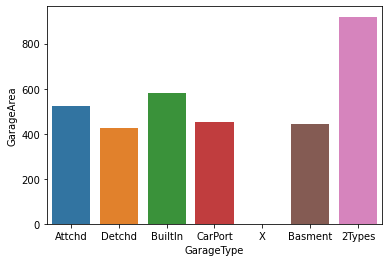

In [112]:
sb.barplot(x='GarageType', y="GarageArea", ci=None, data=train)

In [113]:
test["GarageArea"][1116] = train[train["GarageType"] == 'Detchd']["GarageArea"].mean().astype("int64")

In [114]:
test["GarageQual"][666] = train[train["GarageType"] == 'Detchd']["GarageQual"].mode()[0]
test["GarageQual"][1116] = train[train["GarageType"] == 'Detchd']["GarageQual"].mode()[0]

In [115]:
test["GarageCond"][666] = train[train["GarageType"] == 'Detchd']["GarageCond"].mode()[0]
test["GarageCond"][1116] = train[train["GarageType"] == 'Detchd']["GarageCond"].mode()[0]

In [116]:
ty = test[test["GarageType"].isnull()].index.tolist()
blt = test[test["GarageYrBlt"].isnull()].index.tolist()
fi = test[test["GarageFinish"].isnull()].index.tolist()
car = test[test["GarageCars"].isnull()].index.tolist()
area = test[test["GarageArea"].isnull()].index.tolist()
qual = test[test["GarageQual"].isnull()].index.tolist()
cond = test[test["GarageCond"].isnull()].index.tolist()

print(ty)
print(blt)
print(fi)
print(car)
print(area)
print(qual)
print(cond)

[53, 71, 79, 92, 96, 98, 100, 130, 133, 134, 154, 155, 257, 261, 327, 348, 350, 351, 359, 362, 371, 374, 376, 379, 387, 433, 550, 621, 630, 633, 636, 639, 644, 675, 691, 693, 729, 730, 731, 732, 733, 752, 778, 786, 893, 894, 938, 939, 962, 966, 1092, 1093, 1097, 1115, 1119, 1143, 1149, 1231, 1233, 1248, 1307, 1311, 1329, 1331, 1339, 1399, 1402, 1410, 1428, 1431, 1432, 1433, 1449, 1453, 1454, 1457]
[53, 71, 79, 92, 96, 98, 100, 130, 133, 134, 154, 155, 257, 261, 327, 348, 350, 351, 359, 362, 371, 374, 376, 379, 387, 433, 550, 621, 630, 633, 636, 639, 644, 675, 691, 693, 729, 730, 731, 732, 733, 752, 778, 786, 893, 894, 938, 939, 962, 966, 1092, 1093, 1097, 1115, 1119, 1143, 1149, 1231, 1233, 1248, 1307, 1311, 1329, 1331, 1339, 1399, 1402, 1410, 1428, 1431, 1432, 1433, 1449, 1453, 1454, 1457]
[53, 71, 79, 92, 96, 98, 100, 130, 133, 134, 154, 155, 257, 261, 327, 348, 350, 351, 359, 362, 371, 374, 376, 379, 387, 433, 550, 621, 630, 633, 636, 639, 644, 675, 691, 693, 729, 730, 731, 732, 733

In [117]:
ty_fix = []
for t in ty:
    if t not in blt or t not in fi or t not in qual or t not in cond:
        ty_fix.append(t)

blt_fix = []
for b in blt:
    if b not in ty or b not in fi or b not in qual or b not in cond:
        blt_fix.append(b)

fi_fix = []
for f in fi:
    if f not in ty or f not in blt or f not in qual or f not in cond:
        fi_fix.append(f)

qual_fix = []
for q in qual:
    if q not in ty or q not in blt or q not in fi or q not in cond:
        qual_fix.append(q)

cond_fix = []
for c in cond:
    if c not in ty or c not in blt or c not in fi or c not in qual:
        cond_fix.append(c)

print(ty_fix)
print(blt_fix)
print(fi_fix)
print(qual_fix)
print(cond_fix)

[]
[]
[]
[]
[]


In [118]:
test["GarageType"].fillna("X", inplace=True)
test["GarageYrBlt"].fillna(0, inplace=True)
test["GarageFinish"].fillna("X", inplace=True)
test["GarageQual"].fillna("X", inplace=True)
test["GarageCond"].fillna("X", inplace=True)

In [119]:
test.columns[test.isnull().any()].tolist()

['SaleType']

In [122]:
train.columns[train.isnull().any()].tolist()

[]